# Optymalizacja

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy


Celem tego ćwiczenia jest porównanie wydajność różnych metod optymalizacji dostępnych w Pythonie. 

**Zadanie 1.**

Do tego rodzaju testów często wykorzystuje się funkcję Rosenbrocka:
$$
f(\mathbf{x})=\sum_{i=1}^{N-1}\left[100\left(x_{i+1}-x_i^2\right)^2+\left(1-x_i\right)^2\right] \quad \text { gdzie } \quad \mathbf{x}=\left(x_1, \ldots, x_N\right) \in \mathbb{R}^N
$$

W przypadku dwóch zmienny funkcja sprowadza się do postaci:
$$f(x, y)=(1-x)^2+100\left(y-x^2\right)^2$$

Zaimplementuj trójwymiarową (dwie zmienne) funkcję Rosenbrocka i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-10,10]$). 

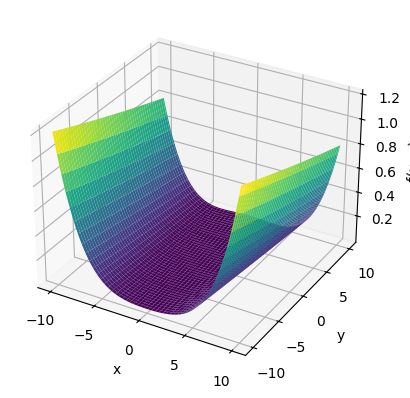

In [2]:
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock_function(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_function(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()

**Zadanie 2.**

Inną popularną funkcją jest funkcja rastrigin
$$ f(\mathbf{x})=A n+\sum_{i=1}^n\left[x_i^2-A \cos \left(2 \pi x_i\right)\right]$$
gdzie $A=10$ oraz $x_i \in[-5.12,5.12]$

Zaimplementuj jej trójwymiarową (dwie zmienne) wersję i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-5.12,5.12]$). 

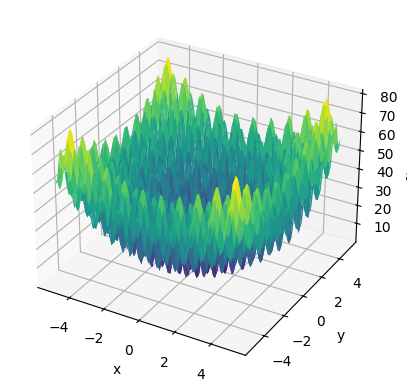

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rastrigin_function(x, y, A=10):
    return A * 2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin_function(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()

**Zadanie 3**

Gdzie znajdują się minima lokalne i globalne powyższych funkcji?

**Zadanie 4.**

Zapoznaj się z dokumentacją modułu `optimize` z pakietu scipy i spróbuj znaleźć minima powyższych funkcji za pomocą kilku dostępnych w tym pakiecie metod (rozważ różne opcje funkcji `minimize` lub inne funkcje). Która z nich działa najszybciej (jeżeli jest taka możliwość, porównaj liczby iteracji lub czas działania)? Która daje dobre wyniki? Czy któraś z funkcji nie znajduje minimum? Zbadaj znaczenie parametrów.

Wyniki dla funkcji Rosenbrocka:
Metoda: Nelder-Mead
Minimum: 3.6861769151759075e-10, Punkt: [1.00000439 1.00001064], Iteracje: 79, Czas: 0.0020 s

Metoda: Powell
Minimum: 1.232595164407831e-30, Punkt: [1. 1.], Iteracje: 16, Czas: 0.0030 s

Metoda: CG
Minimum: 2.0085382242752512e-11, Punkt: [0.99999552 0.99999103], Iteracje: 21, Czas: 0.0070 s

Metoda: BFGS
Minimum: 2.8439915001532524e-11, Punkt: [0.99999467 0.99998932], Iteracje: 19, Czas: 0.0020 s

Metoda: L-BFGS-B
Minimum: 9.138630509774964e-12, Punkt: [0.99999698 0.99999395], Iteracje: 21, Czas: 0.0030 s

Metoda: TNC
Minimum: 9.670760401826812e-12, Punkt: [0.99999689 0.99999377], Iteracje: 15, Czas: 0.0030 s

Metoda: COBYLA
Minimum: 0.028138894599864524, Punkt: [0.83241251 0.69218033], Iteracje: N/A, Czas: 0.0060 s

Wyniki dla funkcji Rastrigina:
Metoda: Nelder-Mead
Minimum: 0.0, Punkt: [0. 0.], Iteracje: 4, Czas: 0.0010 s

Metoda: Powell
Minimum: 0.0, Punkt: [-4.01972436e-11 -4.01972436e-11], Iteracje: 1, Czas: 0.0000 s

Metoda: CG

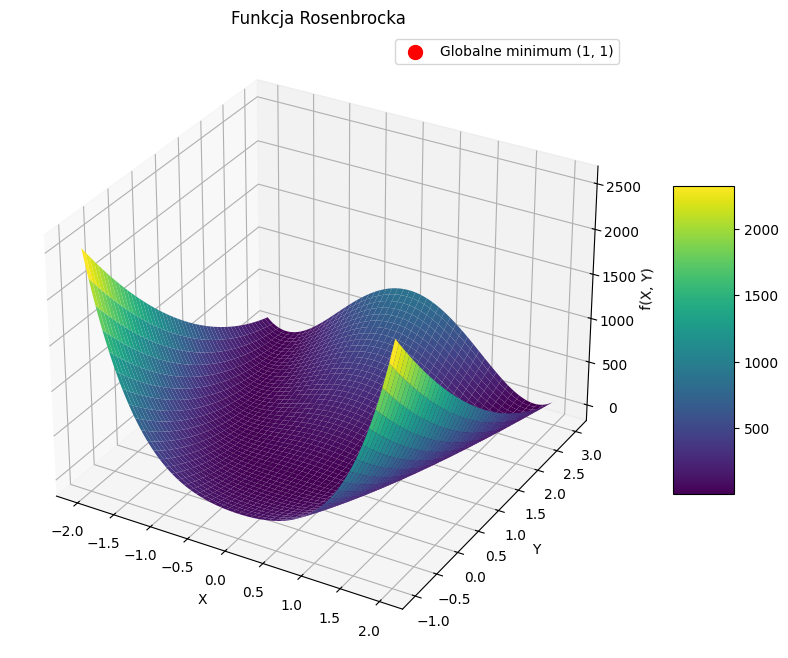

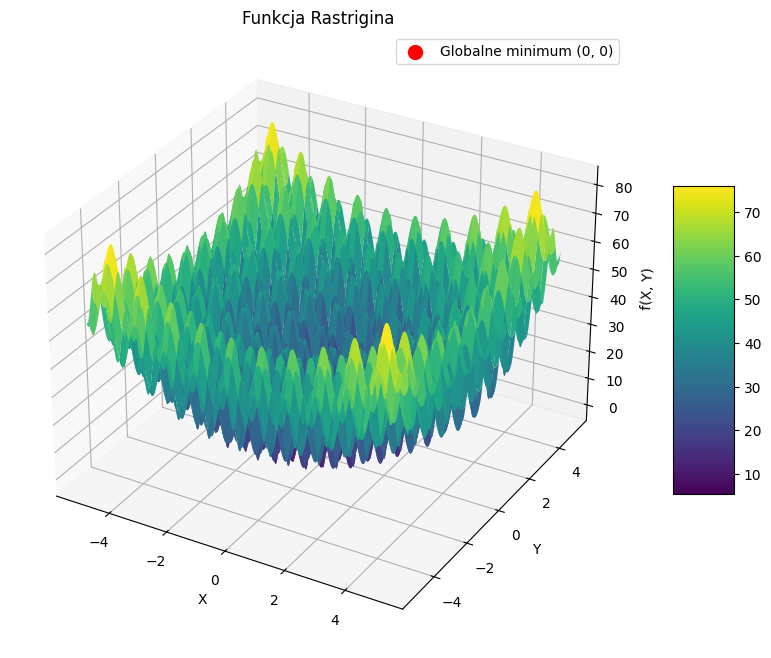

In [4]:
import numpy as np
from scipy.optimize import minimize
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definicja funkcji Rosenbrocka dla dwóch zmiennych
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Definicja funkcji Rastrigina dla dwóch zmiennych
def rastrigin(x, A=10):
    return A * 2 + (x[0]**2 - A * np.cos(2 * np.pi * x[0])) + (x[1]**2 - A * np.cos(2 * np.pi * x[1]))

# Punkt startowy
x0_rosenbrock = np.array([0, 0])
x0_rastrigin = np.array([0, 0])

# Lista metod do przetestowania
methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA']

results_rosenbrock = {}
results_rastrigin = {}

# Optymalizacja dla funkcji Rosenbrocka
for method in methods:
    start_time = time.time()
    res = minimize(rosenbrock, x0_rosenbrock, method=method)
    end_time = time.time()
    results_rosenbrock[method] = {
        'fun': res.fun,
        'x': res.x,
        'nit': res.nit if 'nit' in res else 'N/A',
        'time': end_time - start_time
    }

# Optymalizacja dla funkcji Rastrigina
for method in methods:
    start_time = time.time()
    res = minimize(rastrigin, x0_rastrigin, method=method)
    end_time = time.time()
    results_rastrigin[method] = {
        'fun': res.fun,
        'x': res.x,
        'nit': res.nit if 'nit' in res else 'N/A',
        'time': end_time - start_time
    }

# Wyniki dla funkcji Rosenbrocka
print("Wyniki dla funkcji Rosenbrocka:")
for method, result in results_rosenbrock.items():
    print(f"Metoda: {method}")
    print(f"Minimum: {result['fun']}, Punkt: {result['x']}, Iteracje: {result['nit']}, Czas: {result['time']:.4f} s")
    print()

# Wyniki dla funkcji Rastrigina
print("Wyniki dla funkcji Rastrigina:")
for method, result in results_rastrigin.items():
    print(f"Metoda: {method}")
    print(f"Minimum: {result['fun']}, Punkt: {result['x']}, Iteracje: {result['nit']}, Czas: {result['time']:.4f} s")
    print()

# Wykres funkcji Rosenbrocka z zaznaczonym minimum
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.scatter(1, 1, 0, color='r', s=100, label='Globalne minimum (1, 1)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Funkcja Rosenbrocka')
ax.legend()
plt.show()

# Wykres funkcji Rastrigina z zaznaczonym minimum
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin([X, Y])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.scatter(0, 0, 0, color='r', s=100, label='Globalne minimum (0, 0)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Funkcja Rastrigina')
ax.legend()
plt.show()
